In [46]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import StringIO
import requests
import json
import pandas as pd
%matplotlib inline

In [47]:
# The code was removed by DSX for sharing.

In [48]:
df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'prove.csv'), sep=";")
df_data_1.head()

,Material,Usura_mat_mm,Usura_mat_g,Usura_disco_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,...,Vmax,Rendimento,Indice_misura,Attrezzatura,Raggio_ruota,Area_pistone,CodImpianto,Raggio_medio,Disco_nuovo,Disco
0,9482,0.55,6.7,8.0,164,1,166,167,753,768,...,190,1,2,0,308,22.9,0,117.7,0,280x22
1,9799,0.54,9.7,5.0,169,1,194,184,740,742,...,195,1,2,0,308,22.9,1,118.0,0,280X22
2,16136,0.50,8.9,5.0,196,1,196,194,768,743,...,195,1,2,0,308,22.9,2,104.0,0,256X22
3,19269,0.36,7.9,6.0,194,1,194,190,0,0,...,195,1,2,0,308,22.9,2,104.0,0,256X22
4,19269,0.58,8.8,5.4,190,1,213,195,0,0,...,190,1,1,0,308,22.9,3,117.7,0,280x22


In [49]:
df_data_1.describe()

,Material,Usura_mat_mm,Usura_mat_g,Usura_disco_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,...,Press_accost,Vmax,Rendimento,Indice_misura,Attrezzatura,Raggio_ruota,Area_pistone,CodImpianto,Raggio_medio,Disco_nuovo
count,653.000000,653.00000,653.000000,653.000000,653.000000,653.000000,653.000000,650.000000,653.000000,653.000000,...,653.0,653.000000,653,653.000000,653.000000,653.000000,653.000000,652.000000,653.000000,653.000000
mean,20668.571210,1.05611,13.232006,7.838285,198.894334,1.217458,175.343032,175.313846,208.984686,208.453292,...,0.5,191.012251,1,1.986217,0.001531,307.623277,22.996294,5.881902,110.135375,0.009188
std,6272.771726,0.70927,7.996596,8.604602,25.954825,1.284118,43.668705,44.198669,328.141602,327.358947,...,0.0,5.431941,0,0.116677,0.039133,2.873970,0.493346,3.900039,6.761052,0.095488
min,8951.000000,0.21000,5.600000,-0.100000,146.000000,0.000000,37.000000,36.000000,0.000000,0.000000,...,0.5,169.000000,1,1.000000,0.000000,290.000000,22.900000,0.000000,104.000000,0.000000
25%,15761.000000,0.64000,8.600000,4.700000,180.000000,0.000000,147.000000,146.000000,0.000000,0.000000,...,0.5,185.000000,1,2.000000,0.000000,308.000000,22.900000,1.000000,104.000000,0.000000
50%,23292.000000,0.91000,11.000000,7.000000,194.000000,1.000000,173.000000,173.000000,0.000000,0.000000,...,0.5,190.000000,1,2.000000,0.000000,308.000000,22.900000,7.000000,104.000000,0.000000
75%,25291.000000,1.18000,14.700000,10.000000,213.000000,1.000000,198.000000,197.000000,623.000000,625.000000,...,0.5,195.000000,1,2.000000,0.000000,308.000000,22.900000,8.000000,117.700000,0.000000
max,29526.000000,8.69000,101.800000,194.700000,305.000000,4.000000,481.000000,489.000000,930.000000,867.000000,...,0.5,215.000000,1,2.000000,1.000000,315.000000,25.520000,15.000000,118.000000,1.000000


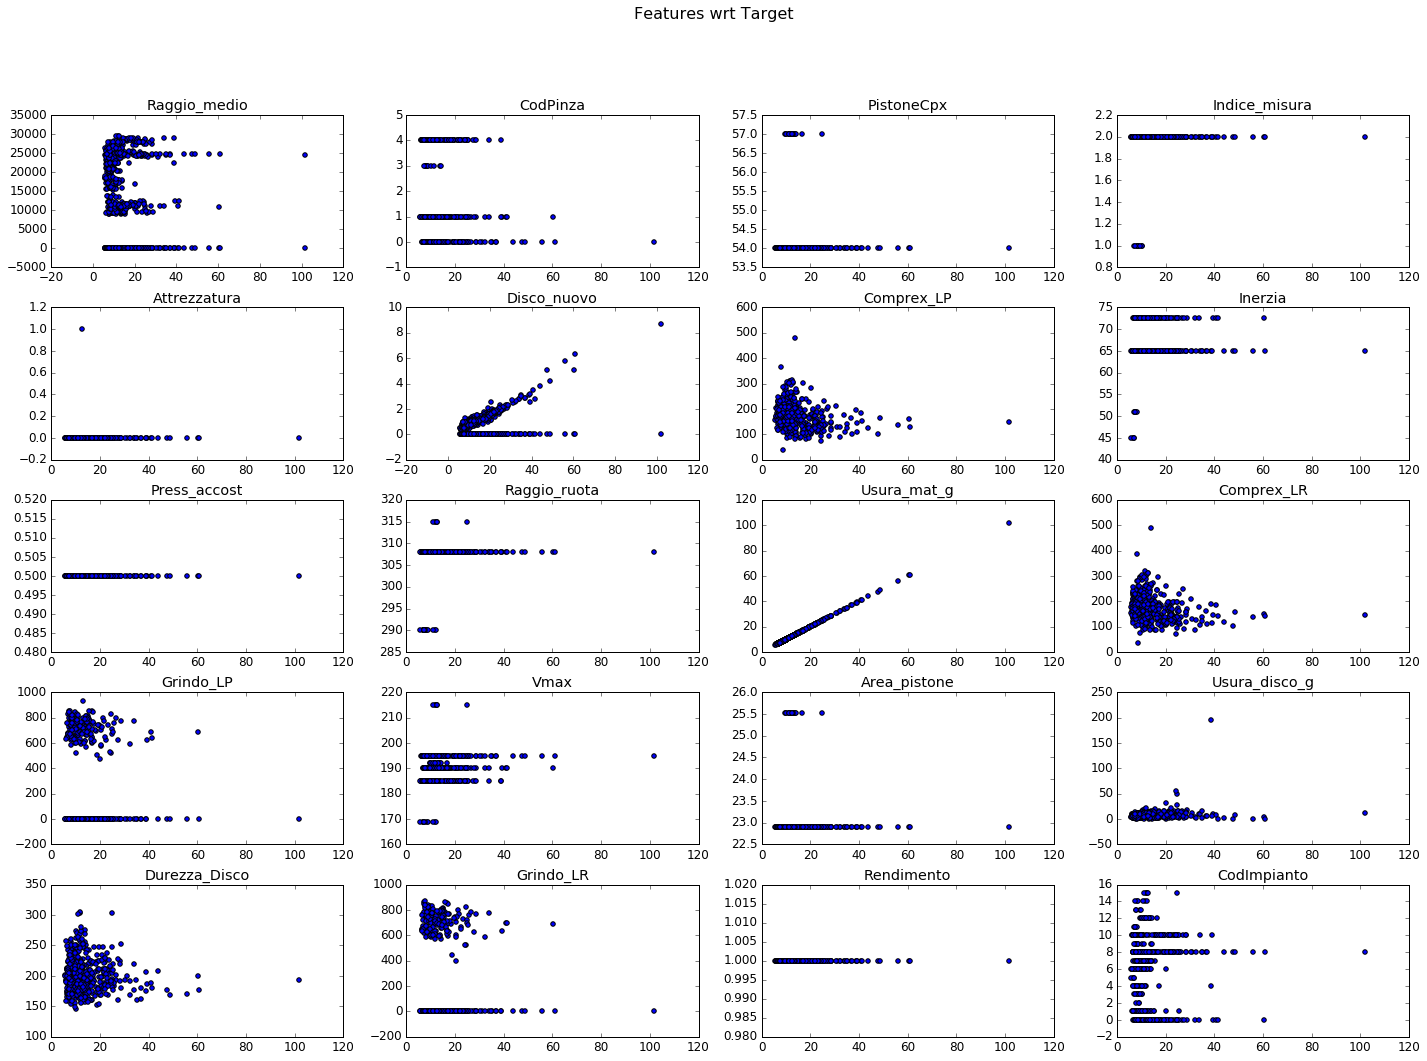

In [138]:
fig, axarr = plt.subplots(5, 4,figsize=(20, 15))
fig.suptitle("Features wrt Target", fontsize=16)

for index,col in enumerate(df_data_1.columns):
    if col != "Disco":
        i = index%5
        j = index%4
        axarr[i,j].scatter(df_data_1['Usura_mat_g'], df_data_1[col])
        axarr[i,j].set_title(col)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

In [2]:
df_data_1 = df_data_1.drop("Usura_mat_mm",1)
df_data_1 = df_data_1.drop("Usura_disco_g",1)
df_data_1 = df_data_1.drop("Grindo_LP",1)
df_data_1 = df_data_1.drop("Grindo_LR",1)
df_data_1 = df_data_1.drop("Press_accost",1)

In [6]:
df_data_1 = df_data_1.drop("Rendimento",1)

In [21]:
df_data_2 = pd.get_dummies(df_data_1, columns=["CodPinza","Indice_misura","Attrezzatura","CodImpianto","Disco_nuovo","Disco"])

In [32]:
print df_data_1.shape
print df_data_2.shape

(653, 17)
(653, 42)


In [33]:
df_data_2.head()

,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,PistoneCpx,Inerzia,Vmax,Raggio_ruota,Area_pistone,...,CodImpianto_13.0,CodImpianto_14.0,CodImpianto_15.0,Disco_nuovo_0,Disco_nuovo_1,Disco_256X22,Disco_256x22,Disco_276x24,Disco_280X22,Disco_280x22
0,9482,6.7,164,166,167,54,72.5,190,308,22.9,...,0,0,0,1,0,0,0,0,0,1
1,9799,9.7,169,194,184,54,65.0,195,308,22.9,...,0,0,0,1,0,0,0,0,1,0
2,16136,8.9,196,196,194,54,65.0,195,308,22.9,...,0,0,0,1,0,1,0,0,0,0
3,19269,7.9,194,194,190,54,65.0,195,308,22.9,...,0,0,0,1,0,1,0,0,0,0
4,19269,8.8,190,213,195,54,72.5,190,308,22.9,...,0,0,0,1,0,0,0,0,0,1


In [37]:
df_data_2.describe()

,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,PistoneCpx,Inerzia,Vmax,Raggio_ruota,Area_pistone,...,CodImpianto_13.0,CodImpianto_14.0,CodImpianto_15.0,Disco_nuovo_0,Disco_nuovo_1,Disco_256X22,Disco_256x22,Disco_276x24,Disco_280X22,Disco_280x22
count,653.000000,653.000000,653.000000,653.000000,650.000000,653.00000,653.000000,653.000000,653.000000,653.000000,...,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.00000,653.000000
mean,20668.571210,13.232006,198.894334,175.343032,175.313846,54.11026,66.632466,191.012251,307.623277,22.996294,...,0.006126,0.009188,0.009188,0.990812,0.009188,0.004594,0.539051,0.036753,0.06585,0.353752
std,6272.771726,7.996596,25.954825,43.668705,44.198669,0.56490,3.967041,5.431941,2.873970,0.493346,...,0.078086,0.095488,0.095488,0.095488,0.095488,0.067676,0.498855,0.188300,0.24821,0.478500
min,8951.000000,5.600000,146.000000,37.000000,36.000000,54.00000,45.000000,169.000000,290.000000,22.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,15761.000000,8.600000,180.000000,147.000000,146.000000,54.00000,65.000000,185.000000,308.000000,22.900000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,23292.000000,11.000000,194.000000,173.000000,173.000000,54.00000,65.000000,190.000000,308.000000,22.900000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
75%,25291.000000,14.700000,213.000000,198.000000,197.000000,54.00000,72.500000,195.000000,308.000000,22.900000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,29526.000000,101.800000,305.000000,481.000000,489.000000,57.00000,72.500000,215.000000,315.000000,25.520000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
